In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from quivr.utils import rewrite_program_postgres, str_to_program_postgres
import seaborn as sns

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

synthetic_scene_graph_without_duration-npred_5-nattr_pred_1
budget: 20, f1_median: 0.416, runtime_median: 1054.0
budget: 50, f1_median: 0.836, runtime_median: 2234.0
budget: 100, f1_median: 0.844, runtime_median: 3922.0
synthetic_scene_graph_without_duration-npred_5-nattr_pred_2
budget: 20, f1_median: 0.37, runtime_median: 1080.0
budget: 50, f1_median: 0.779, runtime_median: 2310.0
budget: 100, f1_median: 0.944, runtime_median: 3814.0
synthetic_scene_graph_with_duration-npred_5-nattr_pred_2
budget: 20, f1_median: 0.523, runtime_median: 1095.0
budget: 50, f1_median: 0.796, runtime_median: 2197.0
budget: 100, f1_median: 0.673, runtime_median: 3984.0


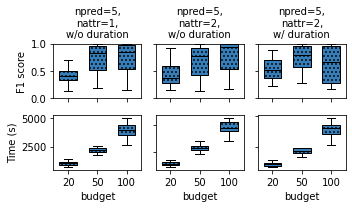

In [153]:
def plot_scene_graph():
    dataset_names = ["synthetic_scene_graph_without_duration-npred_5-nattr_pred_1",
                       "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2", 
                        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2"
                       ]
    short_names = ["npred=5,\nnattr=1,\nw/o duration", "npred=5,\nnattr=2,\nw/o duration", "npred=5,\nnattr=2,\nw/ duration"]
    fig, axs = plt.subplots(2, len(dataset_names), figsize = (5, 3))
    
    for dataset_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
        print(dataset_name)
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

        budgets = [20, 50, 100]
        handles_f1 = []
        handles_runtime = []
        legend_labels = []

        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk")
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)

        f1_data = []
        runtime_data = []
        for x_idx, budget in enumerate(budgets):
            f1_slice = f1[:, x_idx]
            runtime_slice = runtime[:, x_idx]
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("budget: {}, f1_median: {}, runtime_median: {}".format(budget, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[0, dataset_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        bp_runtime = axs[1, dataset_idx].boxplot(runtime_data, 
                       positions=np.array(range(len(runtime_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        handles_runtime.append(bp_runtime["boxes"][0])

        axs[0, dataset_idx].set(xlabel="budget", ylabel="F1 score")
        axs[0, dataset_idx].set_ylim(bottom=0, top=1)
        axs[0, dataset_idx].set_xticks(range(0, len(budgets), 1), budgets)

        axs[1, dataset_idx].set(xlabel="budget", ylabel="Time (s)")
        axs[1, dataset_idx].set_xticks(range(0, len(budgets), 1), budgets)
        axs[0, dataset_idx].set_title(short_name, fontsize=10)
    for ax in axs.flat:
        ax.label_outer()
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/scene_graph_queries.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

plot_scene_graph()

synthetic_scene_graph_without_duration-npred_5-nattr_pred_2
init_example: 5, f1_median: 0.578, runtime_median: 2790.0
init_example: 10, f1_median: 0.505, runtime_median: 2750.0
init_example: 15, f1_median: 0.884, runtime_median: 3563.0
init_example: 20, f1_median: 0.929, runtime_median: 3657.0
init_example: 25, f1_median: 0.975, runtime_median: 3997.0
synthetic_scene_graph_without_duration-npred_5-nattr_pred_1
init_example: 5, f1_median: 0.339, runtime_median: -1.0
init_example: 10, f1_median: 0.636, runtime_median: -1.0
init_example: 15, f1_median: 0.97, runtime_median: -1.0
init_example: 20, f1_median: 0.974, runtime_median: -1.0
init_example: 25, f1_median: 0.972, runtime_median: -1.0
synthetic_scene_graph_without_duration-npred_5-nattr_pred_0
init_example: 5, f1_median: 0.178, runtime_median: -1.0
init_example: 10, f1_median: 0.604, runtime_median: -1.0
init_example: 15, f1_median: 0.997, runtime_median: -1.0
init_example: 20, f1_median: 1.0, runtime_median: -1.0
init_example: 25, 

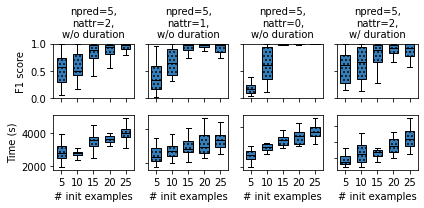

In [162]:
def vary_init_examples():
    dataset_names = ["synthetic_scene_graph_without_duration-npred_5-nattr_pred_2",
                     "synthetic_scene_graph_without_duration-npred_5-nattr_pred_1",
                     "synthetic_scene_graph_without_duration-npred_5-nattr_pred_0",
                     "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2"
                    ]
    
    short_names = ["npred=5,\nnattr=2,\nw/o duration", "npred=5,\nnattr=1,\nw/o duration", "npred=5,\nnattr=0,\nw/o duration", "npred=5,\nnattr=2,\nw/ duration"]

    fig, axs = plt.subplots(2, len(dataset_names), figsize = (6, 3))

    init_examples = [5, 10, 15, 20, 25]
    
    for dataset_idx, (dataset_name, short_name) in enumerate(zip(dataset_names, short_names)):
        print(dataset_name)
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
        handles_f1 = []
        handles_runtime = []
        legend_labels = []

        f1_data = []
        runtime_data = []
        for init_example in init_examples:
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk-init_{}-additional_50".format(init_example))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    f1.extend(stats["score_median"])
                    runtime.extend(stats["runtime"])
                except:
                    pass

            f1 = np.array(f1)
            runtime = np.array(runtime)

            f1_slice = f1[:, 0]
            runtime_slice = runtime[:, 0]
            if np.all(f1_slice == -1):
                f1_slice = np.zeros_like(f1_slice)
            else:
                f1_slice[f1_slice == -1] = np.nan
            f1_slice = f1_slice[~np.isnan(f1_slice)]
            print("init_example: {}, f1_median: {}, runtime_median: {}".format(init_example, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
            if np.all(runtime_slice == -1):
                runtime_slice = np.zeros_like(runtime_slice)
            else:
                runtime_slice[runtime_slice == -1] = np.nan
            runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
            f1_data.append(f1_slice)
            runtime_data.append(runtime_slice)
        bp_f1 = axs[0, dataset_idx].boxplot(f1_data, 
                       positions=np.array(range(len(f1_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        bp_runtime = axs[1, dataset_idx].boxplot(runtime_data, 
                       positions=np.array(range(len(runtime_data))), 
                       sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                       medianprops = dict(color='black'))   
        handles_f1.append(bp_f1["boxes"][0])
        handles_runtime.append(bp_runtime["boxes"][0])
 
        axs[0, dataset_idx].set(xlabel="# init examples", ylabel="F1 score")
        axs[0, dataset_idx].set_ylim(bottom=0, top=1)
        axs[0, dataset_idx].set_xticks(range(0, len(init_examples), 1), init_examples)
        axs[0, dataset_idx].set_title(short_name, fontsize=10)
        axs[1, dataset_idx].set(xlabel="# init examples", ylabel="Time (s)")
        axs[1, dataset_idx].set_xticks(range(0, len(init_examples), 1), init_examples)
    
    for ax in axs.flat:
        ax.label_outer()
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/vary_init_examples.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_init_examples()
# plot_scene_graph("synthetic_scene_graph_without_duration-npred_5-nattr_pred_1", "vocal_postgres-topk")
# vary_init_examples("synthetic_scene_graph_without_duration-npred_5-nattr_pred_2", "vocal_postgres-topk", fixed_budget_or_additional="budget")
# vary_init_examples("synthetic_scene_graph_without_duration-npred_5-nattr_pred_2", "vocal_postgres-topk", fixed_budget_or_additional="additional")
# vary_init_examples("synthetic_scene_graph_without_duration-npred_5-nattr_pred_1", "vocal_postgres-topk", fixed_budget_or_additional="additional")
# vary_init_examples("synthetic_scene_graph_without_duration-npred_5-nattr_pred_0", "vocal_postgres-topk", fixed_budget_or_additional="additional")
# vary_init_examples("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres-topk", fixed_budget_or_additional="additional")
# vary_init_examples("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres_most_likely_positive-topk", fixed_budget_or_additional="additional")
# plot_scene_graph("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres-topk")

scene_graphs vocal_postgres-topk additional
init_example: 5, f1_median: 0.14, runtime_median: 2464.0
init_example: 10, f1_median: 0.129, runtime_median: 3118.0
init_example: 15, f1_median: 0.225, runtime_median: 3513.0
init_example: 20, f1_median: 0.405, runtime_median: 4263.0
init_example: 25, f1_median: 0.347, runtime_median: 4927.0


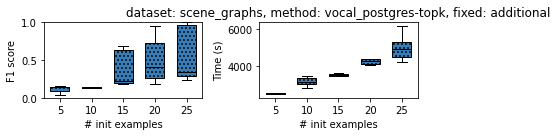

In [5]:
vary_init_examples("scene_graphs", "vocal_postgres-topk", fixed_budget_or_additional="additional")

synthetic_scene_graph_with_duration-npred_5-nattr_pred_2 vocal_postgres-topk
bw: 5, f1_median: 0.854, f1_mean: 0.663, runtime_median: 1818.0
[0.15404475 1.         0.91095591 0.28334198 0.30982143 0.29722521
 0.94189433 0.9640826  0.81842818 0.35261708 0.56485356 1.
 0.90843806 0.56266198 0.88936782 0.97655336 0.91402715 0.94133513
 0.31432275 0.16139689]
bw: 10, f1_median: 0.876, f1_mean: 0.77, runtime_median: 3368.0
[0.15428075 1.         0.62200957 0.92918597 0.32703488 0.28597957
 0.90570299 0.97026461 0.8134058  0.31784512 1.         0.99166667
 0.86703097 0.68235294 0.99853801 0.99194139 0.86167513 0.85985401
 0.88585786 0.93078056]
bw: 15, f1_median: 0.94, f1_mean: 0.807, runtime_median: 4534.0
[0.99170616 0.99052133 0.58595909 0.84951606 0.31006613 0.2955826
 0.96471885 0.96474538 0.94617564 0.45912469 1.         1.
 0.67030398 0.9347079  0.99271137 0.99340659 0.87390762 0.45488372
 0.85516286 1.        ]
bw: 20, f1_median: 0.847, f1_mean: 0.762, runtime_median: 5773.0
[0.47638

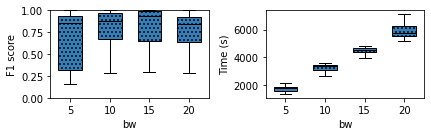

In [24]:
def vary_bw(dataset_name, method):
    print(dataset_name, method)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, axs = plt.subplots(1, 2, figsize = (6, 2))
    
    bw_values = [5, 10, 15, 20]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for bw in bw_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-bw_{}".format(bw))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("bw: {}, f1_median: {}, f1_mean: {}, runtime_median: {}".format(bw, np.round(np.median(f1_slice), 3), np.round(np.mean(f1_slice), 3), np.round(np.median(runtime_slice))))
        print(f1_slice)
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[0].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    bp_runtime = axs[1].boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    
    axs[0].set(xlabel="bw", ylabel="F1 score")
    axs[0].set_ylim(bottom=0, top=1)
    axs[0].set_xticks(range(0, len(bw_values), 1), bw_values)
    
    axs[1].set(xlabel="bw", ylabel="Time (s)")
    axs[1].set_xticks(range(0, len(bw_values), 1), bw_values)
    
#     plt.title("dataset: {}, method: {}".format(dataset_name, method))
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/vary_bw.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_bw("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres-topk")

synthetic_scene_graph_with_duration-npred_5-nattr_pred_2 vocal_postgres-topk
k: 25, f1_median: 0.708, runtime_median: 3361.0
k: 50, f1_median: 0.865, runtime_median: 3297.0
k: 75, f1_median: 0.893, runtime_median: 3254.0
k: 100, f1_median: 0.876, runtime_median: 3368.0
k: 1, f1_median: 0.866, runtime_median: 3452.0
k: 100, f1_median: 0.876, runtime_median: 3368.0
k: 1000, f1_median: 0.901, runtime_median: 3683.0


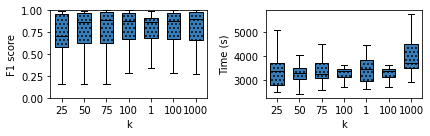

In [9]:
def vary_k(dataset_name, method):
    print(dataset_name, method)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, axs = plt.subplots(1, 2, figsize = (6, 2))
    
#     k_values = [25, 50, 75, 100]
    k_values = [25, 50, 75, 100, 1, 100, 1000]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for k_value in k_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-k_{}".format(k_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("k: {}, f1_median: {}, runtime_median: {}".format(k_value, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[0].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    bp_runtime = axs[1].boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    
    axs[0].set(xlabel="k", ylabel="F1 score")
    axs[0].set_ylim(bottom=0, top=1)
    axs[0].set_xticks(range(0, len(k_values), 1), k_values)
    
    axs[1].set(xlabel="k", ylabel="Time (s)")
    axs[1].set_xticks(range(0, len(k_values), 1), k_values)
    
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
#     plt.savefig("figures/vary_k.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_k("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres-topk")

synthetic_scene_graph_with_duration-npred_5-nattr_pred_2
with active learning
init_example: 5, f1_median: 0.602, runtime_median: 2729.0
init_example: 10, f1_median: 0.658, runtime_median: 3212.0
init_example: 15, f1_median: 0.876, runtime_median: 3368.0
init_example: 20, f1_median: 0.915, runtime_median: 3766.0
init_example: 25, f1_median: 0.915, runtime_median: 4161.0
without active learning
init_example: 5, f1_median: 0.488, runtime_median: 2118.0
init_example: 10, f1_median: 0.625, runtime_median: 2392.0
init_example: 15, f1_median: 0.839, runtime_median: 2771.0
init_example: 20, f1_median: 0.845, runtime_median: 3056.0
init_example: 25, f1_median: 0.864, runtime_median: 3183.0


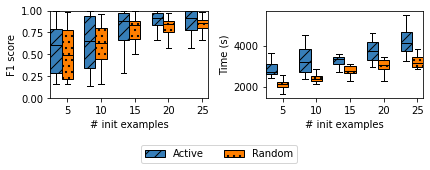

In [30]:
def with_and_without_active_learning(dataset_name):
    print(dataset_name)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)
    fig, axs = plt.subplots(1, 2, figsize = (6, 2))
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    init_examples = [5, 10, 15, 20, 25]
    
    # With active learning
    print("with active learning")
    f1_data = []
    runtime_data = []
    for init_example in init_examples:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", "vocal_postgres-topk-init_{}-additional_50".format(init_example))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)

        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        print("init_example: {}, f1_median: {}, runtime_median: {}".format(init_example, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[0].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data)))*3-1, 
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '//'),
                   medianprops = dict(color='black'))   
    bp_runtime = axs[1].boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data)))*3-1, 
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '//'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    legend_labels.append("Active")

    
    # Without active learning
    print("without active learning")
    f1_data = []
    runtime_data = []
    for init_example in init_examples:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", "vocal_postgres_no_active_learning-topk-init_{}".format(init_example))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)

        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        print("init_example: {}, f1_median: {}, runtime_median: {}".format(init_example, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
    bp_f1 = axs[0].boxplot(f1_data, 
                   positions=np.array(range(len(f1_data)))*3, 
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[1], hatch = '..'),
                   medianprops = dict(color='black'))   
    bp_runtime = axs[1].boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data)))*3, 
                   sym='.', widths=1, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[1], hatch = '..'),
                   medianprops = dict(color='black'))   
    handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    legend_labels.append("Random")    
    
    axs[0].set(xlabel="# init examples", ylabel="F1 score")
    axs[0].set_ylim(bottom=0, top=1)
    axs[0].set_xticks(range(0, len(init_examples)*3, 3), init_examples)

    axs[1].set(xlabel="# init examples", ylabel="Time (s)")
    axs[1].set_xticks(range(0, len(init_examples)*3, 3), init_examples)
    
    fig.legend(handles_runtime, legend_labels, prop={"size":10}, loc='upper center', bbox_to_anchor=(0.5, 0.0),
              fancybox=True, shadow=False, ncol=2)
    plt.title("")
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/active_learning.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

with_and_without_active_learning("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2")

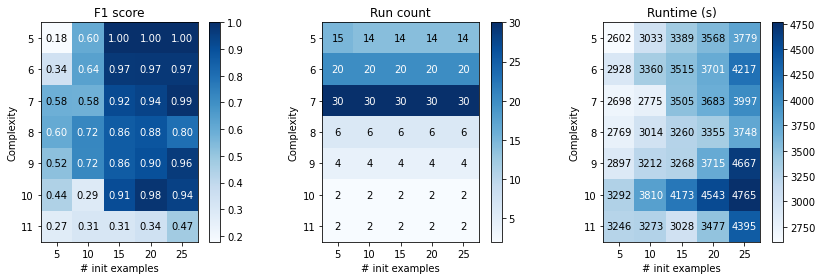

In [163]:
def complexity_cost(program):
    a1 = 1
    a2 = 0.5
    a3 = 0.1
    duration_unit = 5
    cost_npred = sum([a1*len(dict["scene_graph"]) for dict in program])
    cost_duration = sum([(dict["duration_constraint"] // duration_unit) * (a2 + a3 * len(dict["scene_graph"])) for dict in program])
    return cost_npred + cost_duration

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

def heatmap():
    # complexity: [5, 17]
    complexity_values = list(range(5, 12))
    init_examples = [5, 10, 15, 20, 25]

    heatmap_f1 = np.empty((len(complexity_values), len(init_examples)), dtype=object)
    for i in range(heatmap_f1.shape[0]):
        for j in range(heatmap_f1.shape[1]):
            heatmap_f1[i, j] = []

    heatmap_runtime = np.empty((len(complexity_values), len(init_examples)), dtype=object)
    for i in range(heatmap_runtime.shape[0]):
        for j in range(heatmap_runtime.shape[1]):
            heatmap_runtime[i, j] = []
    
    heatmap_count = np.zeros((len(complexity_values), len(init_examples)))
            
    for dataset_name in ["synthetic_scene_graph_without_duration-npred_5-nattr_pred_0", 
                         "synthetic_scene_graph_without_duration-npred_5-nattr_pred_1",
                        "synthetic_scene_graph_without_duration-npred_5-nattr_pred_2",
                        "synthetic_scene_graph_with_duration-npred_5-nattr_pred_2"]:
        
        exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/"

        

        f1_data = []
        runtime_data = []
        for init_idx, init_example in enumerate(init_examples):
            f1 = []
            runtime = []
            dir_name = os.path.join(exp_dir, dataset_name, "stats", "vocal_postgres-topk-init_{}-additional_50".format(init_example))
            for filename in os.listdir(dir_name):
                try:
                    with open(os.path.join(dir_name, filename), "r") as f:
                        stats = json.load(f)
                    query_str = filename[:-5]
                    program = str_to_program_postgres(query_str)
                    complexity = complexity_cost(program)
                    heatmap_f1[int(np.ceil(complexity))-5, init_idx].extend(stats["score_median"])                    
                    heatmap_runtime[int(np.ceil(complexity))-5, init_idx].extend(stats["runtime"])
                except:
                    pass
    
    for i in range(heatmap_f1.shape[0]):
        for j in range(heatmap_f1.shape[1]):
            if len(heatmap_f1[i, j]):
                heatmap_f1[i, j] = np.array(heatmap_f1[i, j])
                heatmap_f1[i, j] = heatmap_f1[i, j][:, 0]
                if np.all(heatmap_f1[i, j] == -1):
                    heatmap_f1[i, j] = np.zeros_like(heatmap_f1[i, j])
                else:
                    heatmap_f1[i, j][heatmap_f1[i, j] == -1] = np.nan
                heatmap_count[i, j] = np.count_nonzero(~np.isnan(heatmap_f1[i, j]))
                heatmap_f1[i, j] = np.round(np.nanmedian(heatmap_f1[i, j]), 3)
            else:
                heatmap_f1[i, j] = np.nan
            if len(heatmap_runtime[i, j]):
                heatmap_runtime[i, j] = np.array(heatmap_runtime[i, j])
                heatmap_runtime[i, j] = heatmap_runtime[i, j][:, 0]
                if np.all(heatmap_runtime[i, j] == -1):
                    heatmap_runtime[i, j] = np.zeros_like(heatmap_runtime[i, j])
                else:
                    heatmap_runtime[i, j][heatmap_runtime[i, j] == -1] = np.nan
                heatmap_runtime[i, j] = np.round(np.nanmedian(heatmap_runtime[i, j]), 3)
            else:
                heatmap_runtime[i, j] = np.nan
    heatmap_f1 = heatmap_f1.astype(float)
    heatmap_runtime = heatmap_runtime.astype(float)
    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    # F1 score
    im = axs[0].imshow(heatmap_f1, cmap="Blues")
    cbar = axs[0].figure.colorbar(im, ax = axs[0], shrink=1.0)
    texts = annotate_heatmap(im, valfmt="{x:.2f}")
    axs[0].set_xticks(np.arange(len(init_examples)), 
                  labels=init_examples)
    axs[0].set_yticks(np.arange(len(complexity_values)),
                  labels=complexity_values)
    axs[0].set(xlabel="# init examples", ylabel="Complexity")
    axs[0].title.set_text("F1 score")
    # Count 
    im = axs[1].imshow(heatmap_count, cmap="Blues")
    cbar = axs[1].figure.colorbar(im, ax = axs[1], shrink=1.0)
    texts = annotate_heatmap(im, valfmt="{x:.0f}")
    axs[1].set_xticks(np.arange(len(init_examples)), 
                  labels=init_examples)
    axs[1].set_yticks(np.arange(len(complexity_values)),
                  labels=complexity_values)
    axs[1].set(xlabel="# init examples", ylabel="Complexity")
    axs[1].title.set_text("Run count")
    # Runtime
    im = axs[2].imshow(heatmap_runtime, cmap="Blues")
    cbar = axs[2].figure.colorbar(im, ax = axs[2], shrink=1.0)
    texts = annotate_heatmap(im, valfmt="{x:.0f}")
    axs[2].set_xticks(np.arange(len(init_examples)), 
                  labels=init_examples)
    axs[2].set_yticks(np.arange(len(complexity_values)),
                  labels=complexity_values)
    axs[2].set(xlabel="# init examples", ylabel="Complexity")
    axs[2].title.set_text("Runtime (s)")

    for ax in axs.flat:
        ax.label_outer()
    fig.tight_layout()
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(heatmap_f1, annot=True, cmap="crest", square=True)
    plt.savefig("figures/heatmap.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

heatmap()

synthetic_scene_graph_with_duration-npred_5-nattr_pred_2 vocal_postgres-topk
cpu: 1, f1_median: 0.914, runtime_median: 50.0
cpu: 2, f1_median: 0.914, runtime_median: 35.0
cpu: 4, f1_median: 0.914, runtime_median: 23.0
cpu: 8, f1_median: 0.914, runtime_median: 19.0


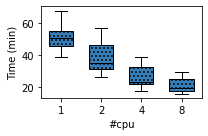

In [25]:
def vary_cpu(dataset_name, method):
    print(dataset_name, method)
    exp_dir = "/gscratch/balazinska/enhaoz/complex_event_video/src/quivr/outputs/{}".format(dataset_name)

    fig, ax = plt.subplots(1, 1, figsize = (3, 2))
    
    cpu_values = [1, 2, 4, 8]
    handles_f1 = []
    handles_runtime = []
    legend_labels = []
    
    f1_data = []
    runtime_data = []
    for cpu_value in cpu_values:
        f1 = []
        runtime = []
        dir_name = os.path.join(exp_dir, "stats", method + "-cpu_{}".format(cpu_value))
        for filename in os.listdir(dir_name):
            try:
                with open(os.path.join(dir_name, filename), "r") as f:
                    stats = json.load(f)
                f1.extend(stats["score_median"])
                runtime.extend(stats["runtime"])
            except:
                pass

        f1 = np.array(f1)
        runtime = np.array(runtime)/60.0
        
        
        f1_slice = f1[:, 0]
        runtime_slice = runtime[:, 0]
        if np.all(f1_slice == -1):
            f1_slice = np.zeros_like(f1_slice)
        else:
            f1_slice[f1_slice == -1] = np.nan
        f1_slice = f1_slice[~np.isnan(f1_slice)]
        if np.all(runtime_slice == -1):
            runtime_slice = np.zeros_like(runtime_slice)
        else:
            runtime_slice[runtime_slice == -1] = np.nan
        runtime_slice = runtime_slice[~np.isnan(runtime_slice)]
        print("cpu: {}, f1_median: {}, runtime_median: {}".format(cpu_value, np.round(np.median(f1_slice), 3), np.round(np.median(runtime_slice))))
        f1_data.append(f1_slice)
        runtime_data.append(runtime_slice)
        
#     bp_f1 = axs[0].boxplot(f1_data, 
#                    positions=np.array(range(len(f1_data))), 
#                    sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
#                    medianprops = dict(color='black'))   
    bp_runtime = ax.boxplot(runtime_data, 
                   positions=np.array(range(len(runtime_data))), 
                   sym='.', widths=0.6, showfliers=False, patch_artist=True, boxprops=dict(facecolor=CB_color_cycle[0], hatch = '...'),
                   medianprops = dict(color='black'))   
#     handles_f1.append(bp_f1["boxes"][0])
    handles_runtime.append(bp_runtime["boxes"][0])
    
#     axs[0].set(xlabel="#cpu", ylabel="F1 score")
#     axs[0].set_ylim(bottom=0, top=1)
#     axs[0].set_xticks(range(0, len(cpu_values), 1), cpu_values)
    
    ax.set(xlabel="#cpu", ylabel="Time (min)")
#     ax.set_ylim(bottom=1000, top=6000)
#     ax.set_yscale('log')
    ax.set_xticks(range(0, len(cpu_values), 1), cpu_values)
    
    plt.subplots_adjust(bottom=0.15)
    fig.tight_layout()
    plt.savefig("figures/vary_cpu.pdf", bbox_inches='tight', pad_inches=0, dpi=600)

vary_cpu("synthetic_scene_graph_with_duration-npred_5-nattr_pred_2", "vocal_postgres-topk")